In [1]:
# Data processing
import pandas as pd
import datetime as dt
from dateutil.parser import parse
import re

In [149]:
# Data visulization
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# read the list until list content is not blnk
def nonblank(list, start) :
    i = start
    while True :

        # condition for end
        if list[i] != '\n' and list[i] != '' :
            break

        # update i
        i = i +1
    return i 

In [3]:
# split list of strings by '\n' or ''
def splitor(list) :
    j = 0 # start point of slicing
    split_data = []

    for i in range(len(list)) :
        if list[i] == '\n' or list[i] =='' :
            if j == i : 
                j = i+1
                continue
            temp = list[j: i]
            split_data.append(temp)
            j = i + 1 

        # update i
        i = i + 1
    
    #print(i,j)
    
    return split_data

In [4]:
# information of server and directory
def process1(list) :
    # information of server and directory

    dic = {}
    
    for i in list :
        a, b = i.split('INFO') # a: time , b : information
        # a = parse(a)

        b = b.replace('██','')
        b = b.replace('\n','')
        b = b.replace(' ','')
        b = b.split(":\t")

        #dic['time'] = a
        dic[b[0]] = b[1]

    df = pd.DataFrame([dic])
    return df   

In [5]:
# informatoin of experiment 
def info_experiment(list) :
    
    temp = {}

    for i in range(len(list)) :

        tem = list[i].replace('\n','')
        if 'INFO' in tem :
            temp['time'] = parse(tem.replace('INFO',''))
        else :
            tem2 = tem.split('=')
            temp[tem2[0]] = tem2[1]
    
    df = pd.DataFrame([temp])

    return df       

In [62]:
# information of data
def data_info(list) :
    dic = {}
    index = [dataset,]

    for i in range(len(list)) :
        tem = list[i].replace('\n','')

        if 'INFO' in tem :
            #temp = l[i].split('INFO')
            #dic3['time'] = [parse(temp[0])]
            pass

        elif '===' in tem :
            temp = tem.replace('=','')
            index.append(temp)

        elif ':' in tem :
            temp = tem.split(": ")
            if temp[0] in dic.keys() :
                #print(dic[temp[0]])
                dic[temp[0]].append(temp[1])
            else :
                dic[temp[0]] = [temp[1]]
        
        else :
            pass

    df = pd.DataFrame(dic, index = index)
    return df
            
            

In [7]:
# exercise 1~8 data[4:11]

# split exercise data
def splitor_exercise(list) :
    
    ex_data = []

    ex_data.append(list[0]) #information of parameters

    i = 1
    while True :
        if list[i] == ')\n' :
            break
        i = i+1
    ex_data.append(list[2:i]) # information of embedding
    
    ex_data.append(list[i+1]) # number of trainable parameters

    j = i + 2
    while True :
        if '+++++Finished training' in list[i] :
            break
        i = i + 1
    ex_data.append(list[j:i]) # exercise result

    ex_data.append(list[i:i+3]) # best result

    return ex_data 

In [8]:
# exercise 1~8 data[4:11]

# parameter information 1
def para_info(string) :
    Parameters = string.replace('\n','').split('Parameters:')[1].replace('=======','').split('=')
    
    rm_word = ['\'','[',']',' ']
    for j in rm_word :
        Parameters[0] = Parameters[0].replace(j,'')
    Parameters[0] = Parameters[0].split(',')

    rm_word2 = [' ','(',')']
    for j in rm_word2 :
        Parameters[1] = Parameters[1].replace(j,'')
    Parameters[1] = Parameters[1].split(',')

    para = {}
    for j in range(len(Parameters[0])) :
        para[Parameters[0][j]] = float(Parameters[1][j])

    df = pd.DataFrame([para])

    return df

    

In [9]:
# exercise 1~8 data[4:11]

# embedding information 

def embedding_info(list) :
    info = {}
    for i in range(len(list)) :
        temp = list[i].replace('\n','')

        temp = temp.split(': ')
        info[temp[0].replace(' ','')] = temp[1]

    df = pd.DataFrame([info])
    return df    

In [10]:
# exercise 1~8 data[4:11]

# embedding information 

def num_trainpara(string) :
    dic = {}
    num = re.search(r'\d+', string)
    dic['num of trainable parameters'] = int(num.group(0))
    return pd.DataFrame([dic])

In [11]:
# exercise 1~8 data[4:11]

# epoch and time and loss

def etl(state, type, time) : 
    temp = {}

    ex_epoch, ex_time, ex_trainloss = re.findall(r'\d+\.\d+|\d+', state) # experiment epoch, experiment time. experiment train loss

    ex_epoch = int(ex_epoch)
    ex_time = float(ex_time)
    ex_trainloss = float(ex_trainloss)

    temp['type'] = type
    temp['epoch'] = ex_epoch
    temp['time'] = ex_time
    temp['loss'] = ex_trainloss

    df_temp = pd.DataFrame([temp], index = [time])

    return df_temp

In [12]:
# exercise 1~8 data[4:11]

# result of exercise : recall's

def result(state, type, time) :
    
    metrics = re.findall(r'(\S+): (\d+\.\d+)', state)
    temp = {key: float(value) for key, value in metrics}
    temp['type'] = type

    df_temp = pd.DataFrame([temp], index = [time])

    return df_temp

In [13]:
# exercise 1~8 data[4:11]

def experiment(list) :
    df = pd.DataFrame()
    i = 0

    while True : 
        #print(list[i])

        # distinguish experiment time and other information
        time, state = list[i].replace('\n','').split(' INFO ')
        time = parse(time)

        """
        Type of states
        1. training time and loss
        2. evluating time and loss
        3. valid result
        4. tet result
        5. Best validation result is updated!
        """
        # 1. training time and loss
        if 'training' in state :
            type = 'training'
            df_temp = etl(state, type, time)

        # 2. evaluating time and loss
        elif 'evaluating' in state :
            type = 'evaluating'
            df_temp = etl(state, type, time)

        # 3. valid result
        elif 'valid result' in state :
            type = 'valid result'
            i = i + 1
            state = list[i]
            df_temp = result(state, type, time)

        # 4. tet result
        elif 'test result' in state :
            type = 'test result'
            i = i + 1
            state = list[i]
            df_temp = result(state, type, time) 

        # 5. Best validation result is updated!
        else :
            temp = {'update' : state.replace('██ ','')}
            df_temp = pd.DataFrame([temp],index = [time])
    
        df = pd.concat([df,df_temp])

        # update i 
        i = i + 1
        if i == len(list) :
            break
        
    return df

In [14]:
# all over data
# parameter information 1
def para_info2(string) :
    Parameters = string.replace('\n','').split('Parameters:')[1].split('=')
    
    rm_word = ['\'','[',']',' ']
    for j in rm_word :
        Parameters[0] = Parameters[0].replace(j,'')
    Parameters[0] = Parameters[0].split(',')

    rm_word2 = [' ','(',')']
    for j in rm_word2 :
        Parameters[1] = Parameters[1].replace(j,'')
    Parameters[1] = Parameters[1].split(',')

    return Parameters

In [15]:
# all over data

# result of over all data : recall's

def AllOverResult(state) :
    
    type = re.findall(r'best (\S+):',state)
    metrics = re.findall(r'(\S+): (\d+\.\d+)', state)
    temp = {key: float(value) for key, value in metrics}
    temp['type'] = type

    return temp

In [16]:
# all over data

# make dataframe showing resul with parameter index 

def AllOver(l) :
    temp = l[2:-1]

    df = pd.DataFrame()

    for i in range(len(temp)) :
        if 'INFO' in temp[i] :
            ind_name, ind = para_info2(temp[i])
            ind = ind[:-1]
            #print(ind)


        else : 
            result = AllOverResult(temp[i])
            df_temp = pd.DataFrame(result, index = [f'{ind}'])
            df = pd.concat([df,df_temp])

        df.index.name = f'{ind_name}'

    return df        

In [17]:
# best result

def AllOverResult2(state) :
    
    type = re.findall(r'([A-Za-z]+):',state)[0]
    metrics = re.findall(r'(\S+): (\d+\.\d+)', state)
    temp = {key: float(value) for key, value in metrics}
    temp['type'] = type

    return temp

In [18]:
# best 

def Best(l) :
    df = pd.DataFrame()
    for i in range(len(l)) :
        if 'INFO' in l[i] :
            best_parameter = para_info(l[i])
        elif ':' in l[i] :
            best_result = AllOverResult2(l[i])
            best_result = pd.DataFrame([best_result])
            temp = best_parameter.join(best_result)
            df = pd.concat([df,temp])

    return df

In [147]:
def para_to_string(para) :
    param = para_info(para)
    str = ''

    for i in param.columns :
        str = str + f', {i} = {param[i][0]}'

    return str

In [19]:
#input
model = 'BM3'
dataset = 'baby'
date = dt.datetime(2024, 7, 16, 19, 29, 4)

In [20]:
log_name = f"{model}-{dataset}-"+date.strftime("%b-%d-%Y-%H-%M-%S")+".log"
log_name

'BM3-baby-Jul-16-2024-19-29-04.log'

In [21]:
f = open(log_name,"r")
l = f.readlines()
f.close()

In [5]:
length = len(l)
length


6547

In [22]:
data = splitor(l)

In [29]:
data[11]

["Tue 16 Jul 2024 21:24:05 INFO =========8/8: Parameters:['seed', 'n_layers', 'reg_weight', 'dropout']=(999, 2, 0.01, 0.5)=======\n",
 'Tue 16 Jul 2024 21:24:07 INFO BM3(\n',
 '  (user_embedding): Embedding(19445, 64)\n',
 '  (item_id_embedding): Embedding(7050, 64)\n',
 '  (predictor): Linear(in_features=64, out_features=64, bias=True)\n',
 '  (reg_loss): EmbLoss()\n',
 '  (image_embedding): Embedding(7050, 4096)\n',
 '  (image_trs): Linear(in_features=4096, out_features=64, bias=True)\n',
 '  (text_embedding): Embedding(7050, 384)\n',
 '  (text_trs): Linear(in_features=384, out_features=64, bias=True)\n',
 ')\n',
 'Trainable parameters: 33570688\n',
 'Tue 16 Jul 2024 21:24:08 INFO epoch 0 training [time: 0.72s, train loss: 431.2257]\n',
 'Tue 16 Jul 2024 21:24:15 INFO epoch 0 evaluating [time: 3.69s, valid_score: 0.015900]\n',
 'Tue 16 Jul 2024 21:24:15 INFO valid result: \n',
 'recall@5: 0.0080    recall@10: 0.0109    recall@20: 0.0159    recall@50: 0.0273    ndcg@5: 0.0064    ndcg@

In [ ]:
"""
data
0 : Server and Directory
1 : information of experiment
2 : information of dataset
3 : None
4 - 11 : exercise informatoin
12 : All over result
13 : Best result
"""

In [30]:
# information of server and directory
process1(data[0])

,Server,Dir
0,sanghui001,/home/sh0408sh/workspace/MMRec/src


In [31]:
# information of experiment
#data[1]
info_experiment(data[1])

,time,gpu_id,use_gpu,seed,data_path,inter_splitting_label,filter_out_cod_start_users,is_multimodal_model,checkpoint_dir,save_recommended_topk,...,user_graph_dict_file,feat_embed_dim,n_layers,dropout,reg_weight,cl_weight,model,dataset,valid_metric_bigger,device
0,2024-07-16 19:29:05,0,True,[999],../data/,x_label,True,True,saved,True,...,user_graph_dict.npy,64,"[1, 2]","[0.3, 0.5]","[0.1, 0.01]",2.0,BM3,baby,True,cuda


In [63]:
data_info(data[2])

,The number of users,Average actions of users,The number of items,Average actions of items,The number of inters,The sparsity of the dataset
baby,19445,8.269066598097197,7050,22.807375886524824,160792,99.8827082752043%
Training,19445,6.096734379017742,7047,16.82290336313325,118551,99.9134846831415%
Validation,19445,1.0572897917202366,5483,3.749589640707642,20559,99.98071694707788%
Testing,19445,1.1150424273592183,5549,3.907370697422959,21682,99.97990552482683%


In [65]:
# exercise data
ex = splitor_exercise(data[4])

In [74]:
ex[4]

['Tue 16 Jul 2024 19:49:15 INFO +++++Finished training, best eval result in epoch 131\n',
 'Tue 16 Jul 2024 19:49:15 INFO best valid result: recall@5: 0.0340    recall@10: 0.0538    recall@20: 0.0861    recall@50: 0.1460    ndcg@5: 0.0229    ndcg@10: 0.0293    ndcg@20: 0.0375    ndcg@50: 0.0495    precision@5: 0.0071    precision@10: 0.0057    precision@20: 0.0046    precision@50: 0.0031    map@5: 0.0190    map@10: 0.0216    map@20: 0.0238    map@50: 0.0256    \n',
 'Tue 16 Jul 2024 19:49:15 INFO test result: recall@5: 0.0331    recall@10: 0.0547    recall@20: 0.0871    recall@50: 0.1493    ndcg@5: 0.0217    ndcg@10: 0.0287    ndcg@20: 0.0371    ndcg@50: 0.0496    precision@5: 0.0074    precision@10: 0.0061    precision@20: 0.0048    precision@50: 0.0033    map@5: 0.0173    map@10: 0.0201    map@20: 0.0224    map@50: 0.0243    \n']

In [ ]:
"""
ex
0 : parameter informatoin
1 : embedding information
2 : # of trainable parameters
3 : exercise information
4 : Best information

"""

In [66]:
para_info(ex[0])

,seed,n_layers,reg_weight,dropout
0,999.0,1.0,0.1,0.3


In [67]:
embedding_info(ex[1])

,(user_embedding),(item_id_embedding),(predictor),(reg_loss),(image_embedding),(image_trs),(text_embedding),(text_trs)
0,"Embedding(19445, 64)","Embedding(7050, 64)","Linear(in_features=64, out_features=64, bias=T...",EmbLoss(),"Embedding(7050, 4096)","Linear(in_features=4096, out_features=64, bias...","Embedding(7050, 384)","Linear(in_features=384, out_features=64, bias=..."


In [68]:
num_trainpara(ex[2])

,num of trainable parameters
0,33570688


In [69]:
embedding_info(ex[1]).join(num_trainpara(ex[2]))

,(user_embedding),(item_id_embedding),(predictor),(reg_loss),(image_embedding),(image_trs),(text_embedding),(text_trs),num of trainable parameters
0,"Embedding(19445, 64)","Embedding(7050, 64)","Linear(in_features=64, out_features=64, bias=T...",EmbLoss(),"Embedding(7050, 4096)","Linear(in_features=4096, out_features=64, bias...","Embedding(7050, 384)","Linear(in_features=384, out_features=64, bias=...",33570688


In [79]:
exp = experiment(ex[3])
exp

,type,epoch,time,loss,recall@5,recall@10,recall@20,recall@50,ndcg@5,ndcg@10,...,ndcg@50,precision@5,precision@10,precision@20,precision@50,map@5,map@10,map@20,map@50,update
2024-07-16 19:29:20,training,0.0,4.04,408.4973,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-16 19:29:27,evaluating,0.0,3.75,0.0031,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-16 19:29:27,valid result,NaN,NaN,NaN,0.0009,0.0015,0.0031,0.0084,0.0006,0.0008,...,0.0023,0.0002,0.0002,0.0002,0.0002,0.0005,0.0006,0.0007,0.0008,NaN
2024-07-16 19:29:27,test result,NaN,NaN,NaN,0.0014,0.0019,0.0038,0.0092,0.0009,0.0011,...,0.0026,0.0003,0.0002,0.0002,0.0002,0.0007,0.0008,0.0009,0.0011,NaN
2024-07-16 19:29:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BM3--Best validation results updated!!!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-16 19:49:07,test result,NaN,NaN,NaN,0.0332,0.0551,0.0862,0.1486,0.0220,0.0292,...,0.0498,0.0073,0.0061,0.0048,0.0033,0.0178,0.0207,0.0228,0.0248,NaN
2024-07-16 19:49:08,training,152.0,0.57,136.6943,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-16 19:49:15,evaluating,152.0,3.60,0.0858,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-16 19:49:15,valid result,NaN,NaN,NaN,0.0339,0.0542,0.0858,0.1455,0.0227,0.0293,...,0.0492,0.0071,0.0057,0.0045,0.0031,0.0188,0.0214,0.0236,0.0255,NaN


In [152]:
str = para_to_string(ex[0])

type1 = 'training'
example1 = exp[exp['type']==type1]

type2 = 'evaluating'
example2 = exp[exp['type']==type2]

type3 = 'valid result'
example3 = exp[exp['type']==type3]

type4 = 'test result'
example4 = exp[exp['type']==type4]

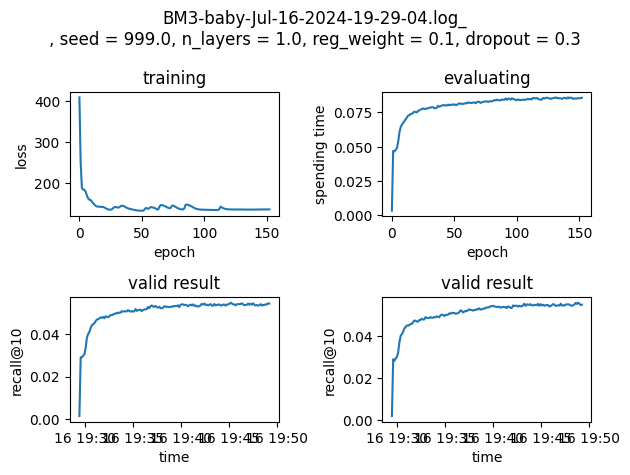

In [166]:
plt.suptitle(f'{log_name}_\n{str}')

ax1 = plt.subplot(221)
plt.title(f'{type1}')
plt.plot(example1['epoch'], example1['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

ax2 = plt.subplot(222)
plt.title(f'{type2}')
plt.plot(example2['epoch'], example2['loss'])
plt.xlabel('epoch')
plt.ylabel('spending time')

ax3 = plt.subplot(223)
plt.title(f'{type3}')
plt.plot(example3.index, example3['recall@10'])
plt.xlabel('time')
plt.ylabel('recall@10')

ax4 = plt.subplot(224)
plt.title(f'{type3}')
plt.plot(example3.index, example4['recall@10'])
plt.xlabel('time')
plt.ylabel('recall@10')

plt.tight_layout()
plt.show()



In [169]:
# all exercise data 1/8 - 8/8
ex_s = []
for i in range(4, 12) :
    ex_s.append(splitor_exercise(data[i]))

In [172]:
exp_s = []
for i in range(len(ex_s)) :
    exp_s.append(experiment(ex_s[i][3]))

In [174]:
str_s = []
for i in range(len(exp_s)) :
    str_s.append(para_to_string(ex_s[i][0]))

In [177]:
type1 = 'training'
type2 = 'evaluating'
type3 = 'valid result'
type4 = 'test result'

example1_s = []
example2_s = []
example3_s = []
example4_s = []

for i in range(len(str_s)) :
    example1_s.append(exp_s[i][exp_s[i]['type']==type1])
    example2_s.append(exp_s[i][exp_s[i]['type']==type2])
    example3_s.append(exp_s[i][exp_s[i]['type']==type3])
    example4_s.append(exp_s[i][exp_s[i]['type']==type4])

In [182]:
len(example3_s[i]['recall@10'])

103

<Figure size 640x480 with 0 Axes>

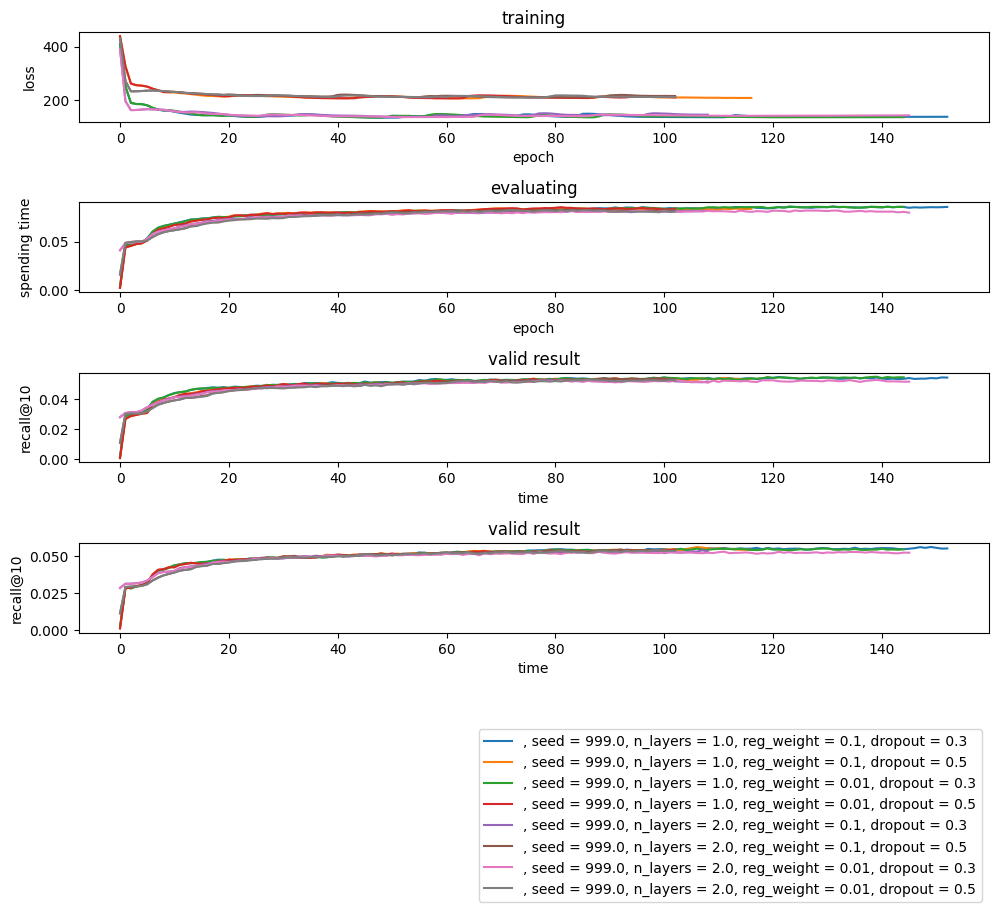

In [196]:
plt.suptitle(f'{log_name}')
plt.figure(figsize=(10,10))

ax1 = plt.subplot(411)
plt.title(f'{type1}')
for i in range(len(ex_s)) :
    plt.plot(example1_s[i]['epoch'], example1_s[i]['loss'], label = str_s[i])
plt.xlabel('epoch')
plt.ylabel('loss')

ax2 = plt.subplot(412)
plt.title(f'{type2}')
for i in range(len(ex_s)) :
    plt.plot(example2_s[i]['epoch'], example2_s[i]['loss'], label = str_s[i])
plt.xlabel('epoch')
plt.ylabel('spending time')

ax3 = plt.subplot(413)
plt.title(f'{type3}')
for i in range(len(ex_s)) :
    plt.plot(range(len(example3_s[i]['recall@10'])),example3_s[i]['recall@10'], label = str_s[i])
plt.xlabel('time')
plt.ylabel('recall@10')

ax4 = plt.subplot(414)
plt.title(f'{type3}')
for i in range(len(ex_s)) :
    plt.plot(range(len(example3_s[i]['recall@10'])), example4_s[i]['recall@10'], label = str_s[i])
plt.xlabel('time')
plt.ylabel('recall@10')

plt.legend(bbox_to_anchor = (1.0,-1.0))
plt.tight_layout()
plt.show()

In [76]:
AllOver(data[12])

,recall@5,recall@10,recall@20,recall@50,ndcg@5,ndcg@10,ndcg@20,ndcg@50,precision@5,precision@10,precision@20,precision@50,map@5,map@10,map@20,map@50,type
"['seed', 'n_layers', 'reg_weight', 'dropout']",,,,,,,,,,,,,,,,,
"['999', '1', '0.1', '0.3']",0.0340,0.0538,0.0861,0.1460,0.0229,0.0293,0.0375,0.0495,0.0071,0.0057,0.0046,0.0031,0.0190,0.0216,0.0238,0.0256,valid
"['999', '1', '0.1', '0.3']",0.0331,0.0547,0.0871,0.1493,0.0217,0.0287,0.0371,0.0496,0.0074,0.0061,0.0048,0.0033,0.0173,0.0201,0.0224,0.0243,test
"['999', '1', '0.1', '0.5']",0.0326,0.0530,0.0844,0.1445,0.0217,0.0283,0.0362,0.0482,0.0069,0.0056,0.0045,0.0031,0.0178,0.0205,0.0226,0.0244,valid
"['999', '1', '0.1', '0.5']",0.0328,0.0538,0.0849,0.1458,0.0215,0.0284,0.0364,0.0487,0.0073,0.0060,0.0047,0.0033,0.0172,0.0200,0.0222,0.0241,test
"['999', '1', '0.01', '0.3']",0.0344,0.0541,0.0863,0.1472,0.0229,0.0293,0.0375,0.0496,0.0072,0.0057,0.0046,0.0031,0.0189,0.0214,0.0236,0.0255,valid
"['999', '1', '0.01', '0.3']",0.0325,0.0540,0.0862,0.1518,0.0215,0.0285,0.0368,0.0501,0.0072,0.0060,0.0048,0.0034,0.0173,0.0201,0.0223,0.0244,test
"['999', '1', '0.01', '0.5']",0.0327,0.0523,0.0855,0.1440,0.0216,0.0280,0.0364,0.0481,0.0069,0.0055,0.0045,0.0030,0.0177,0.0203,0.0225,0.0244,valid
"['999', '1', '0.01', '0.5']",0.0324,0.0539,0.0832,0.1461,0.0215,0.0285,0.0360,0.0487,0.0072,0.0060,0.0046,0.0033,0.0173,0.0201,0.0221,0.0241,test
"['999', '2', '0.1', '0.3']",0.0328,0.0520,0.0826,0.1452,0.0220,0.0282,0.0360,0.0484,0.0068,0.0055,0.0044,0.0031,0.0182,0.0207,0.0228,0.0247,valid


In [78]:
Best(data[13]).set_index('type')

,seed,n_layers,reg_weight,dropout,recall@5,recall@10,recall@20,recall@50,ndcg@5,ndcg@10,ndcg@20,ndcg@50,precision@5,precision@10,precision@20,precision@50,map@5,map@10,map@20,map@50
type,,,,,,,,,,,,,,,,,,,,
Valid,999.0,1.0,0.1,0.3,0.0340,0.0538,0.0861,0.1460,0.0229,0.0293,0.0375,0.0495,0.0071,0.0057,0.0046,0.0031,0.0190,0.0216,0.0238,0.0256
Test,999.0,1.0,0.1,0.3,0.0331,0.0547,0.0871,0.1493,0.0217,0.0287,0.0371,0.0496,0.0074,0.0061,0.0048,0.0033,0.0173,0.0201,0.0224,0.0243
